# Lista 8 - Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_csv('iris.data', header=-1)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

# 1: Importando as métricas implementadas

In [4]:
import metrics
from importlib import reload

reload(metrics);

# 2: Dividindo o dataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.values[:, :-1]
y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, stratify=y, random_state=42, shuffle=True)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 3: Criando o modelo

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression(multi_class='auto', solver='lbfgs')

model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

# 4: Avaliar modelo

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.9481481481481482

In [12]:
metrics.precision_score(y_test, y_pred)

0.9489039329464861

In [13]:
metrics.recall_score(y_test, y_pred)

0.9481481481481482

In [14]:
metrics.f1_measure_score(y_test, y_pred)

0.9485258899951349

# 5: Calcular LogLoss

In [15]:
from sklearn.metrics import log_loss

In [16]:
# Matriz de probabilidade
y_score = model.predict_proba(X_test_std)
print(model.classes_)
print(y_score[:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[8.79823116e-01 1.18453500e-01 1.72338471e-03]
 [9.51866918e-01 4.73691397e-02 7.63942380e-04]
 [9.80512565e-01 1.91478828e-02 3.39552018e-04]
 [9.15521096e-01 8.33181981e-02 1.16070589e-03]
 [6.05656059e-02 6.39334343e-01 3.00100052e-01]]


In [17]:
#Log Loss
log_loss(y_test, y_score)

0.30437519572019617

# 6: Calcular Linha ROC

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

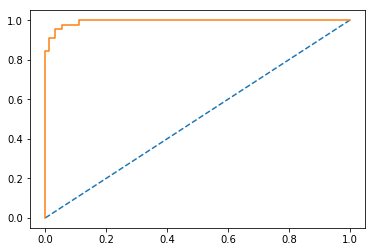

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 2], pos_label='Iris-virginica')
plt.plot([0, 1], [0, 1], '--')# Curva radômica
plt.plot(fpr, tpr);           # Curva AUC

# 7: Calculando AUC

In [20]:
y_test_b = np.where(y_test == 'Iris-virginica', 1, 0)
roc_auc_score(y_test_b, y_score[:, 2])

0.994074074074074